In [13]:
import matplotlib.pyplot as plt

import finesse
from finesse.parse import parse # object for parsing .kat file syntax
from finesse.utilities.xaxis import xaxis

finesse.plotting.init() # initialise matplotlib rcParams to appropriate values for a "display" mode
finesse.LOGGER.setLevel("WARN")

## Finesse 3 Introduction --- Symbolics

In Finesse 2, multiple commands were required to make a parameter of one component track another. As a toy example, consider the case below, where we want to sweep the tunings of both end mirrors of a Fabry-Perot cavity, but at different rates.

```python
kat = pykat.finesse.kat()

kat.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 100M .1 1 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.99 0.01 0 n5 n6

# Set m2's tuning to be twice that of m1
set m1phi m1 phi
func m2phi=$m1phi*2
put m2 phi m2phi
noplot m2phi

ad R 0 n3
ad C 0 n5
ad Cp1 100M n5
ad Cm1 -100M n5
ad T 0 n6

xaxis m1 phi lin -100 100 1000
yaxis db
""")

out = kat.run()
out.plot()
```

In this specific example, the file could be simplified, but in the general case where we want one parameter to be a function of another, this pattern of `set, func, put` must be used. In Finesse 3, this is greatly simplified by the introduction of symbolic parameters, allowing components to directly reference variables and other component's parameters. The above example then becomes

In [14]:
ifo = finesse.parse("""
l l1 1 0 n0
s s1 0 n0 n1 
mod eo1 100M .1 1 pm n1 n2
s s2 1 n2 n3
m m1 0.99 0.01 0 n3 n4
s s3 1 n4 n5
m m2 0.99 0.01 $$2 * m1.phi$$ n5 n6

ad R 0 n3
ad C 0 n5
ad Cp1 100M n5
ad Cm1 -100M n5
ad T 0 n6

xaxis m1 phi lin -100 100 1000
yaxis db
""")

out = ifo.run()

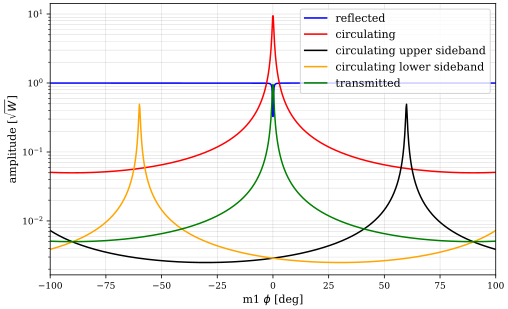

In [15]:
fig = plt.figure(figsize=(8, 5))
plt.semilogy(out.x1, abs(out['R']), label="reflected")
plt.semilogy(out.x1, abs(out['C']), label="circulating")
plt.semilogy(out.x1, abs(out['Cp1']), label="circulating upper sideband")
plt.semilogy(out.x1, abs(out['Cm1']), label="circulating lower sideband")
plt.semilogy(out.x1, abs(out['T']), label="transmitted")
plt.legend()
plt.xlabel("m1 $\phi$ [deg]")
plt.ylabel("amplitude [$\sqrt{W}$]");